# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있음.

## 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

## 데이터

데이터 설정 및 분리

In [2]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 로스 실시간 출력

In [3]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

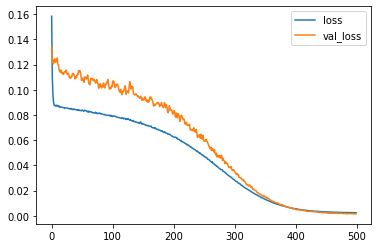

loss =  0.0023707186337560415 , val_loss =  0.0014208890497684479


In [4]:
# dnn 모델

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

plot_losses = PlotLosses()
# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])    # ADD <---------------

## 모델 저장 - ModelCheckpoint

모델을 저장할 떄 사용되는 콜백함수

```
- monitor : 모델을 저장할 떄 기준이 되는 값(validation set의 loss가 가장 작을 때 저장하고 싶으면 **'val_loss'** , train set의 loss가 가장 작을 때 저장하고 싶으면 **'loss'** 입력 
- verbose : **0** 화면에 표시되는 것 없이 저장, **1** '저장되었습니다' 화면에 표시되며 저장
- save_best_only : **False** 매 에폭마다 모델이 filepath{epoch}으로 저장, **True** monitor 되고 있는 값을 기준으로 가장 좋은 값으로 모델이 저장
- save_weights_only : **False** 모델 레이어 및 weights 모두 저장, **True** 모델의 weights만 저장
- mode : val_acc 인 경우, 정확도이기 때문에 클수록 좋음. 이때는 **'max'**를 입력, val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋음. 이때는 **'min'**을 입력, **'auto'**로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장
- save_freq : **'epoch'**을 사용할 경우, 매 에폭마다 모델이 저장, **integer**을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장
- options : tf.train.CheckpointOptions를 옵션으로 줄 수 있음.


출처: https://deep-deep-deep.tistory.com/53 [딥딥딥]
```

In [5]:

from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[model_check_point])   # ADD <-------------


Epoch 00001: val_loss improved from inf to 0.07791, saving model to best_model.h5

Epoch 00002: val_loss did not improve from 0.07791

Epoch 00003: val_loss did not improve from 0.07791

Epoch 00004: val_loss did not improve from 0.07791

Epoch 00005: val_loss did not improve from 0.07791

Epoch 00006: val_loss did not improve from 0.07791

Epoch 00007: val_loss did not improve from 0.07791

Epoch 00008: val_loss did not improve from 0.07791

Epoch 00009: val_loss did not improve from 0.07791

Epoch 00010: val_loss did not improve from 0.07791

Epoch 00011: val_loss did not improve from 0.07791

Epoch 00012: val_loss did not improve from 0.07791

Epoch 00013: val_loss did not improve from 0.07791

Epoch 00014: val_loss did not improve from 0.07791

Epoch 00015: val_loss did not improve from 0.07791

Epoch 00016: val_loss did not improve from 0.07791

Epoch 00017: val_loss did not improve from 0.07791

Epoch 00018: val_loss did not improve from 0.07791

Epoch 00019: val_loss did not im

## 조기 종료 - EarlyStopping

In [6]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[early_stopping])   # ADD <-------------

## 학습율 조정 - ReduceLROnPlateau

학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [7]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상 기간동안 유지
    factor=0.2,         # 줄이는 양                              
    min_learning_rate=0.00001)     # 최소 학습율

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[reduce_lr])   # ADD <-------------

# 모두 한 번에 돌려보기 

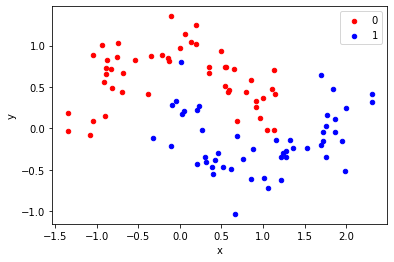

In [8]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


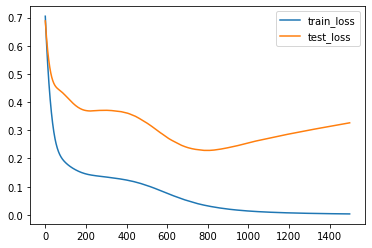

In [9]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


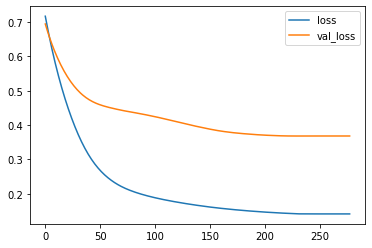

loss =  0.1415722817182541 , val_loss =  0.36840730905532837
Epoch 00278: early stopping


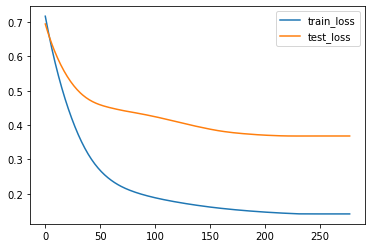

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',  save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()